In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
all=[]
def sigmoid(z):
    z = np.clip(z, -500, 500) #to limit value in array
    return 1 / (1 + np.exp(-z))

In [3]:
def forward_propagation(X, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    return y_hat


In [4]:
def compute_loss(y_hat, y, w, lambd):
    m = y.shape[0]
    epsilon = 1e-10  #to avoid small range of log
    loss = -(1 / m) * np.sum(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
    regularization_term = (lambd / (2 * m)) * np.sum(np.square(w))
    loss += regularization_term # to not overfit
    all.append(loss)
    return loss     

In [5]:

def backward_propagation(X, y, y_hat, w, lambd):
    m = y.shape[0]
    dw = (1 / m) * np.dot(X.T, (y_hat - y))
    dw += (lambd / m) * w
    db = (1 / m) * np.sum(y_hat - y)
    return dw, db

In [6]:

def update_parameters(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b


In [7]:
def train(X, y, num_iterations, learning_rate, lambd):
    m = X.shape[0]
    n = X.shape[1]
    w = np.zeros((n, 1))
    b = 0
    
    for i in range(num_iterations):
        y_hat = forward_propagation(X, w, b)
        loss = compute_loss(y_hat, y, w, lambd)
        dw, db = backward_propagation(X, y, y_hat, w, lambd)
        w, b = update_parameters(w, b, dw, db, learning_rate)
        # if i ==num_iterations-1:
        #     print(f"Loss after iteration {i}: {loss}")
    
    return w, b

In [8]:
def eval(w,b,x,y_true):
    z = np.dot(x, w) + b
    y_pred = sigmoid(z)
    y_pred_class = (y_pred >= 0.50).astype(int) 
    accuracy = np.mean(y_pred_class == y_true) * 100
    return accuracy

In [9]:
def f1score(w,b,x,y_true):
    z=np.dot(x,w)+b
    y_pred=sigmoid(z)
    y_pred_class=(y_pred>=0.5).astype(int)
    tp=0
    fp=0
    fn=0
    tn=0
    for i in range(x.shape[0]):
        if y_pred_class[i]==1 :
            if y_true[i]==1:
                tp+=1
            else :
                fp+=1
        else:
            if y_true[i]==1:
                fn+=1
            else :
                tn+=1
    f1=tp/(tp+(1/2)*(fp+fn))
    return f1


In [10]:
#Running the built model without tunning

from sklearn.preprocessing import StandardScaler,RobustScaler
df=pd.read_csv('ds1_train.csv')
#removing outliners
df['x_2'] = np.log(df['x_2'])
threshold = 2.5
filtered_rows = (abs(df['x_1'] - df['x_1'].mean()) <= threshold * df['x_1'].std()) & \
                (abs(df['x_2'] - df['x_2'].mean()) <= threshold * df['x_2'].std())
df = df[filtered_rows]
X_take=np.array(df.values)

X=df[['x_1','x_2']].values
y=np.array(df['y'].values)

#converting data frame to array and dividing x and y for test




In [11]:
df1=pd.read_csv('ds1_test.csv')
df1['x_2'] = np.log(df1['x_2'])
X1=df1[['x_1','x_2']].values
y1=np.array(df1['y'].values)
y=y.reshape(-1,1)
y1=y1.reshape(-1,1)
#training


[[ 2.91932356]
 [-2.81798762]] 0.9112931553918591
TRAINING DATA
91.3265306122449
0.9125964010282777
TESTING DATA
93.0
0.9306930693069307


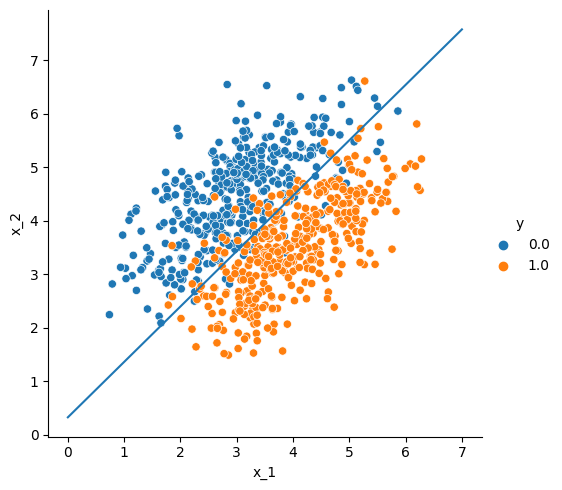

In [12]:
w,b=train(X,y,200000,0.001,2)
print(w,b)

#evalutaion
print("TRAINING DATA")
print(eval(w,b,X,y))
print(f1score(w,b,X,y))
print("TESTING DATA")
print(eval(w,b,X1,y1))
print(f1score(w,b,X1,y1))
inp_arr=np.arange(0,8)
sns.relplot(
    data=df,x='x_1',y='x_2',hue='y'
)
out_arr=(inp_arr*w[0]+b)/(-w[1])
plt.plot(inp_arr,out_arr)

In [27]:
#tunning by dividing X_train into a validation and training data and evalutaion 5 times and taking average
costy=[]
p1,p2=0,0
def Hypertuning(evaluation):
    cost3=0
    w_f=0
    b_f=0
    for i in range(1,5):
      for k in range(1,5):
        acc=0
        for j in range(0,3):
          X_train1=random.sample(range(X_take.shape[0]),650)
          X_train=X_take[X_train1]
          X_eval1= [x for x in X_train1 if x not in X_train]
          X_eval=X_take[X_eval1]
          w,b=train(X_train[:,0:2],X_train[:,2:3],20000,i/1000,k/10)
          if(evaluation=='f1'):
           p=f1score(w,b,X_eval[:,0:2],X_eval[:,2:3])
          if(evaluation=='accuracy'):
           p=eval(w,b,X_eval[:,0:2],X_eval[:,2:3])
          acc+=p
        cost1=acc/3
        costy.append(cost1)
        # print(cost1)
        if cost3<cost1:
            cost3=cost1
            p1=i/1000
            p2=k/10
    return p1,p2
    

In [28]:
Hypertuning('accuracy')#getting best para after tunning metric accuracy
#Hypertuning('f1')#getting best para after tunning metric f1score

(0.003, 0.3)

[(0.001, 0.1), (0.001, 0.2), (0.001, 0.3), (0.001, 0.4), (0.002, 0.1), (0.002, 0.2), (0.002, 0.3), (0.002, 0.4), (0.003, 0.1), (0.003, 0.2), (0.003, 0.3), (0.003, 0.4), (0.004, 0.1), (0.004, 0.2), (0.004, 0.3), (0.004, 0.4)]
[91.20798379272956, 90.84837705365014, 90.74557565612179, 91.20822157545324, 90.84837705365014, 91.1522633744856, 91.66666666666667, 90.8995003392367, 90.99794238683127, 91.30658436213992, 91.92798987996728, 91.00285656312023, 91.51694281166972, 91.3156062044951, 91.20806305363745, 91.2551440329218]


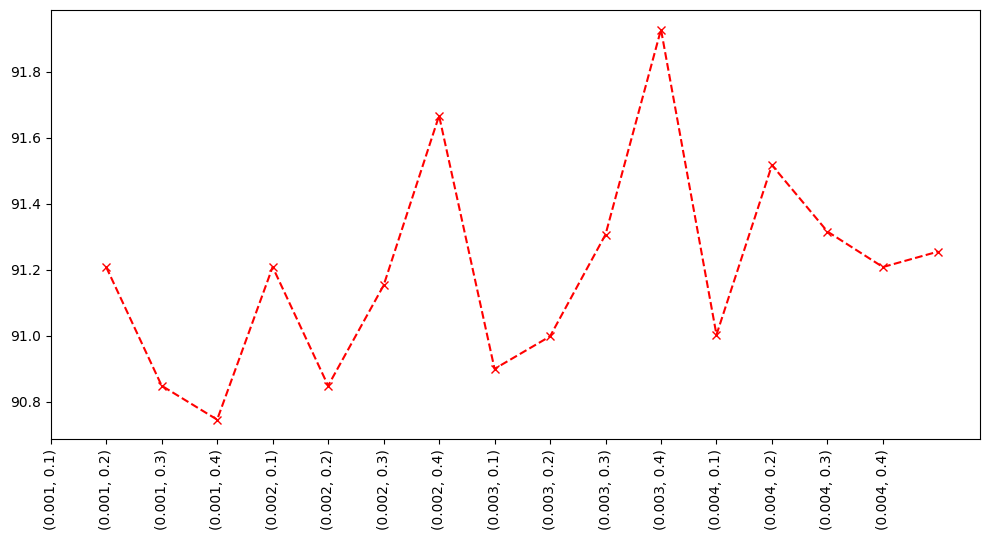

In [36]:
#plotting accuracy for different hyperparameter 
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
x=[]
for i in range(1,5):
    for j in range(1,5):
        x.append((i/1000,j/10))
y3 = costy
default_x_ticks = range(len(x))
plt.plot(range(1, len(x) + 1), y3, marker='x', linestyle='--', color='r', label='List Data')
plt.xticks(default_x_ticks, x,rotation='vertical')
plt.show()

In [38]:
print("TRAINNG DATA")
w,b=train(X,y,200000,0.003,0.4)
print(eval(w,b,X,y))
print(f1score(w,b,X,y))
print(w,b)
print("TESTING DATA")
print(eval(w,b,X1,y1))
print(f1score(w,b,X1,y1))

TRAINNG DATA
90.9438775510204
0.9088575096277278
[[ 3.35232441]
 [-3.41215791]] 1.7717234998361737
TESTING DATA
95.0
0.9504950495049505


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
lg=LogisticRegression()
p=df[['x_1','x_2']].values
p_y=df['y'].values
lg.fit(p,p_y)
ym=lg.predict(p)
print(accuracy_score(ym,p_y)*100)
df2=pd.read_csv('ds2_test.csv')
p1=df2[['x_1','x_2']].values
p3=df2['y'].values
y2=lg.predict(p1)
print(accuracy_score(y2,p3))
print(f1_score(y2,p3))

91.07142857142857
0.91
0.9072164948453608


array([[3.8986789 , 2.06536148],
       [3.22242939, 5.60373072],
       [3.63307742, 2.35880546],
       ...,
       [2.58630307, 4.08873748],
       [4.78239388, 4.13549975],
       [3.1563782 , 3.52438367]])